In [73]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [74]:
concretedata=pd.read_csv('Concrete_Data.csv')
concretedata

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [75]:
concretedata.shape

(1030, 9)

In [76]:
concretedata.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [77]:
concretedata.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [78]:
concretedata.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [79]:
concretedata.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

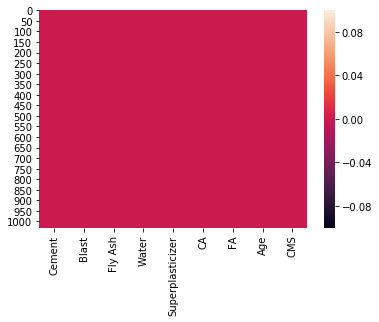

In [80]:
sns.heatmap(concretedata.isnull())

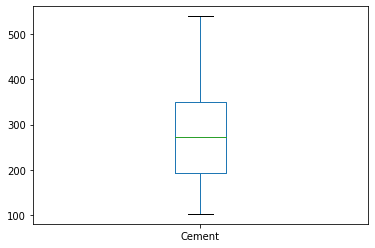

In [81]:
concretedata['Cement'].plot.box()

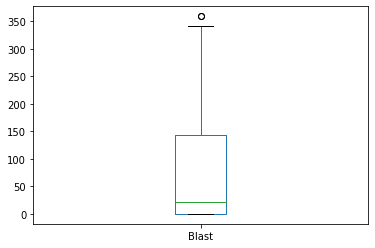

In [82]:
concretedata['Blast'].plot.box()

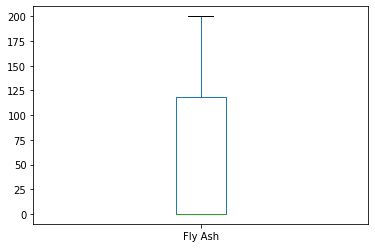

In [83]:
concretedata['Fly Ash'].plot.box()

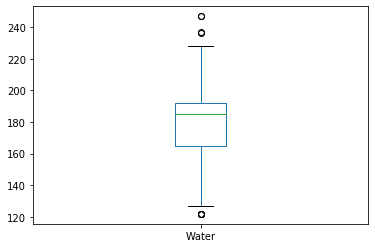

In [84]:
concretedata['Water'].plot.box()

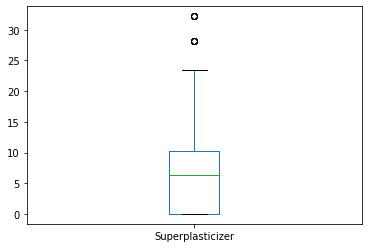

In [85]:
concretedata['Superplasticizer'].plot.box()

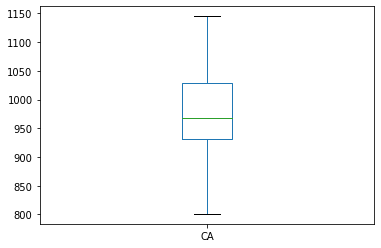

In [86]:
concretedata['CA'].plot.box()

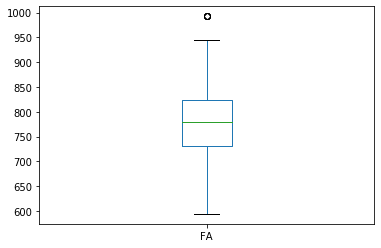

In [87]:
concretedata['FA'].plot.box()

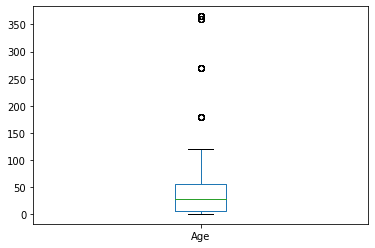

In [88]:
concrete=concretedata
concrete['Age'].plot.box()

Cement                 AxesSubplot(0.125,0.657941;0.227941x0.222059)
Blast               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Fly Ash             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Water                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Superplasticizer    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
CA                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
FA                        AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                    AxesSubplot(0.398529,0.125;0.227941x0.222059)
CMS                    AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

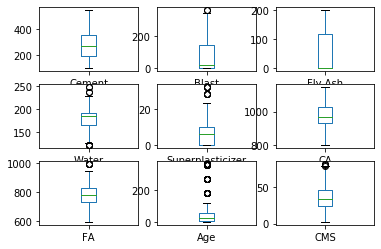

In [89]:
concrete.plot(kind='box',subplots=True,layout=(3,3))

In [90]:
from scipy import stats
z = np.abs(stats.zscore(concrete))
print(z)

[[2.47791487 0.85688789 0.84714393 ... 1.21767004 0.27973311 2.64540763]
 [2.47791487 0.85688789 0.84714393 ... 1.21767004 0.27973311 1.56142148]
 [0.49142531 0.79552649 0.84714393 ... 2.24091709 3.55306569 0.26662698]
 ...
 [1.27008832 0.75957923 0.85063487 ... 0.0801067  0.27973311 0.72572939]
 [1.16860982 1.30806485 0.84714393 ... 0.19116644 0.27973311 0.18253855]
 [0.19403325 0.30849909 0.3769452  ... 0.15074782 0.27973311 0.20469738]]


In [91]:
threshold = 3
print(np.where(z > 3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [92]:
print(z[2][7])

3.553065687407453


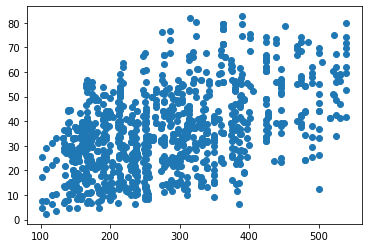

In [93]:
plt.scatter(concrete['Cement'],concrete['CMS'])
plt.show()

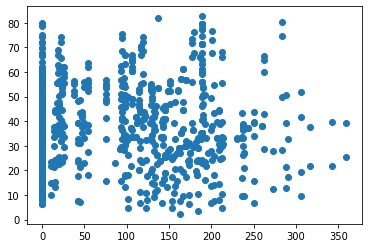

In [94]:

plt.scatter(concrete['Blast'],concrete['CMS'])
plt.show()

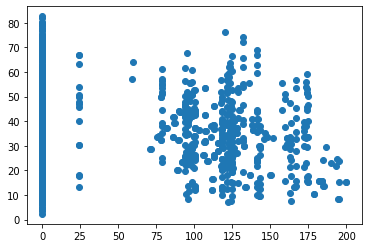

In [95]:
plt.scatter(concrete['Fly Ash'],concrete['CMS'])
plt.show()

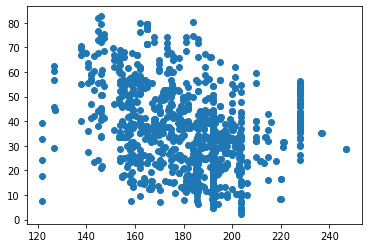

In [96]:
plt.scatter(concrete['Water'],concrete['CMS'])
plt.show()

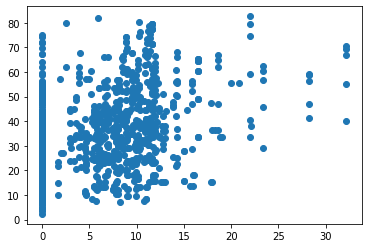

In [97]:
plt.scatter(concrete['Superplasticizer'],concrete['CMS'])
plt.show()

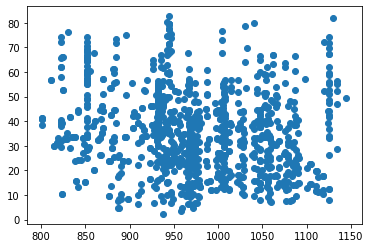

In [98]:
plt.scatter(concrete['CA'],concrete['CMS'])
plt.show()

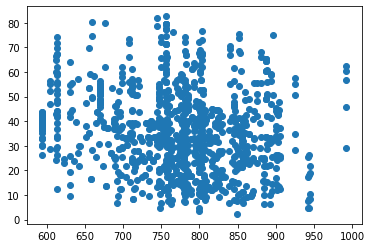

In [99]:
plt.scatter(concrete['FA'],concrete['CMS'])
plt.show()

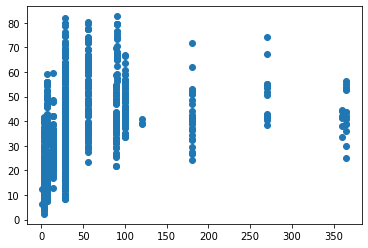

In [35]:
plt.scatter(concrete['Age'],concrete['CMS'])
plt.show()


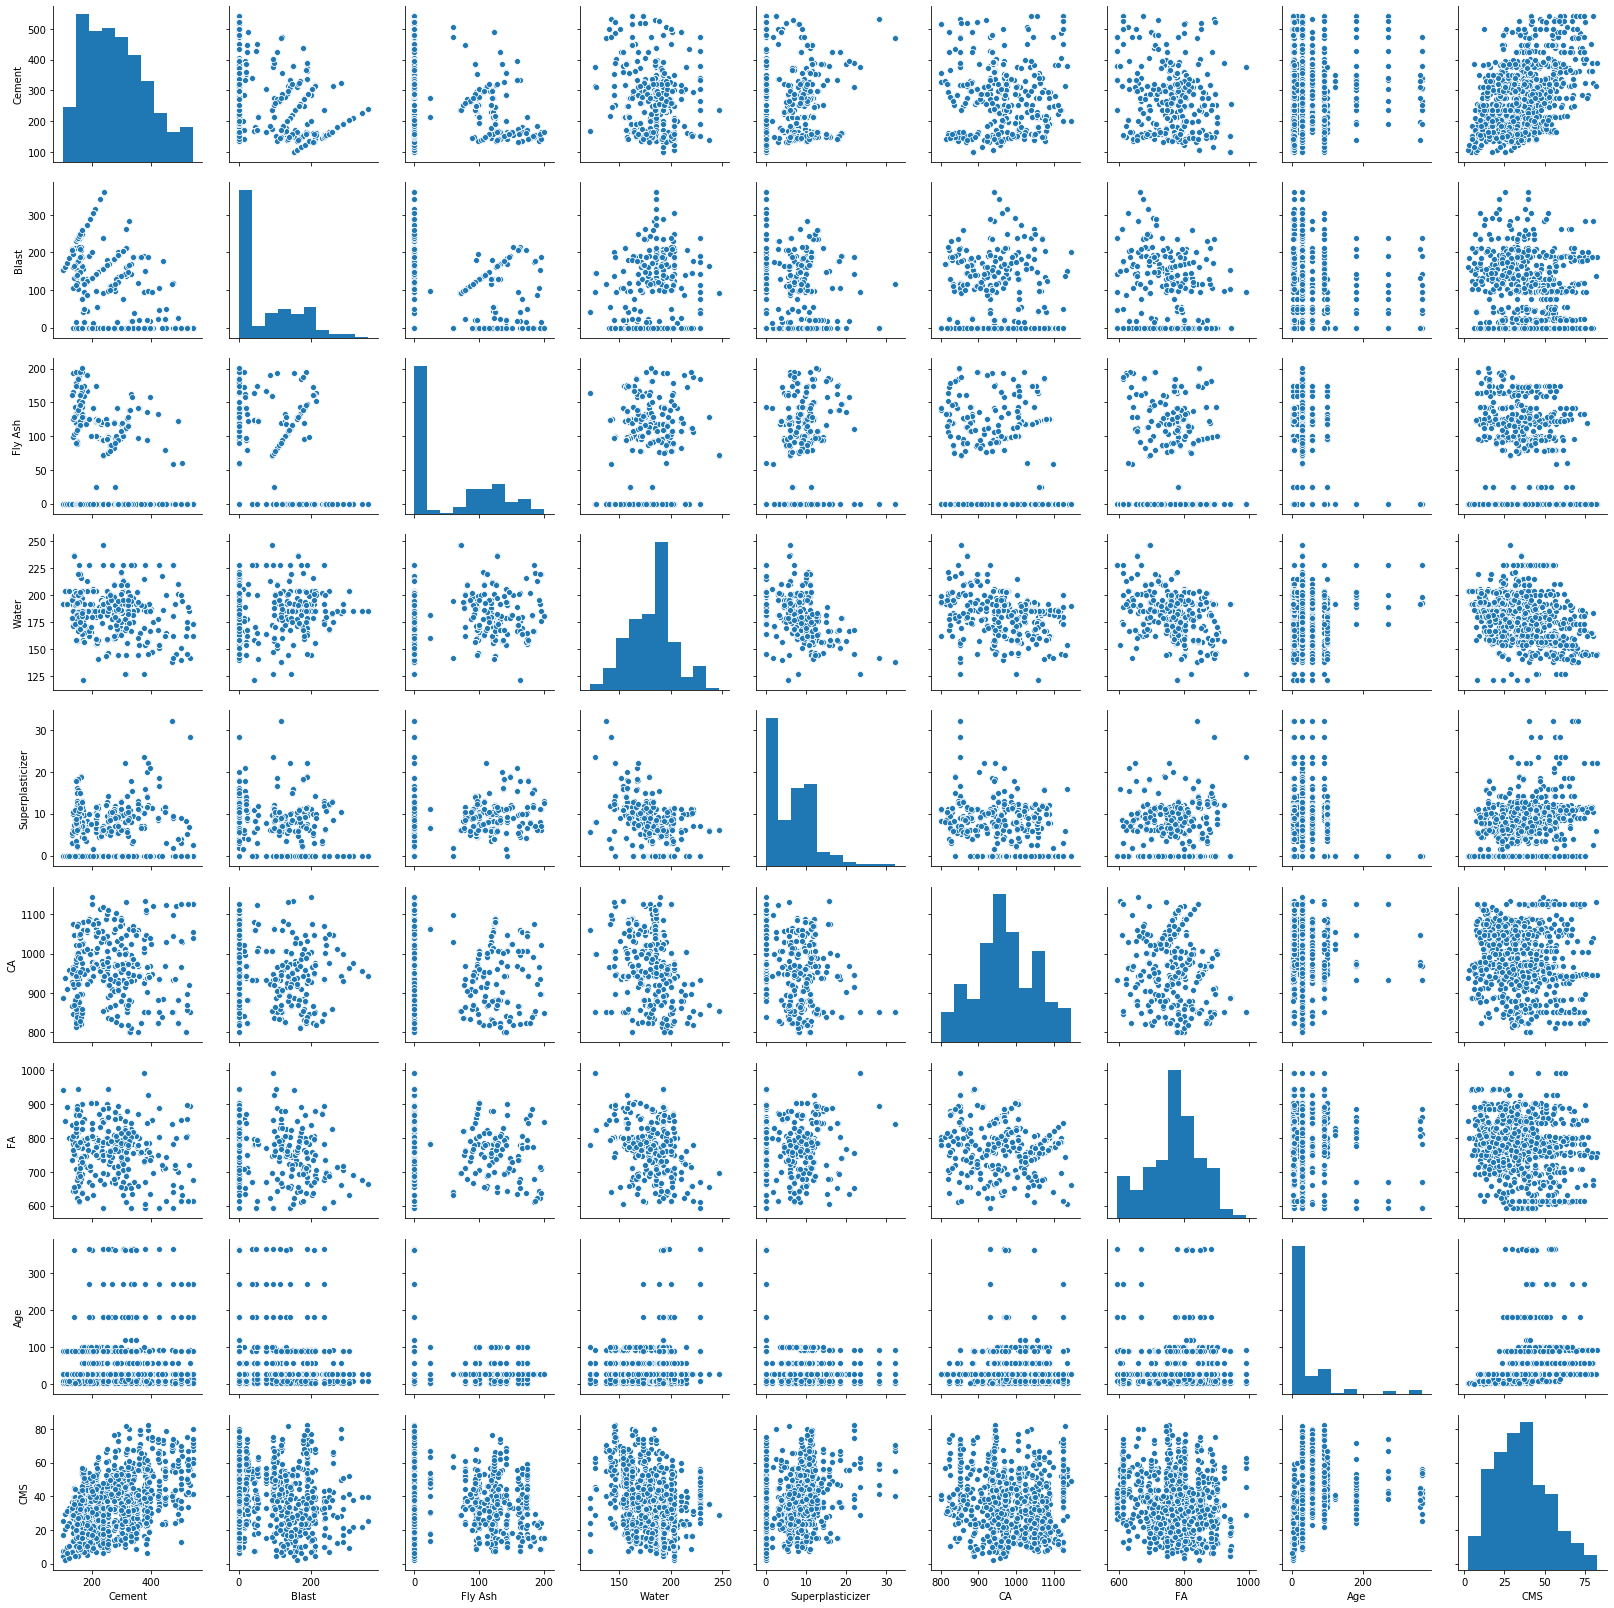

In [36]:
sns.pairplot(concrete)

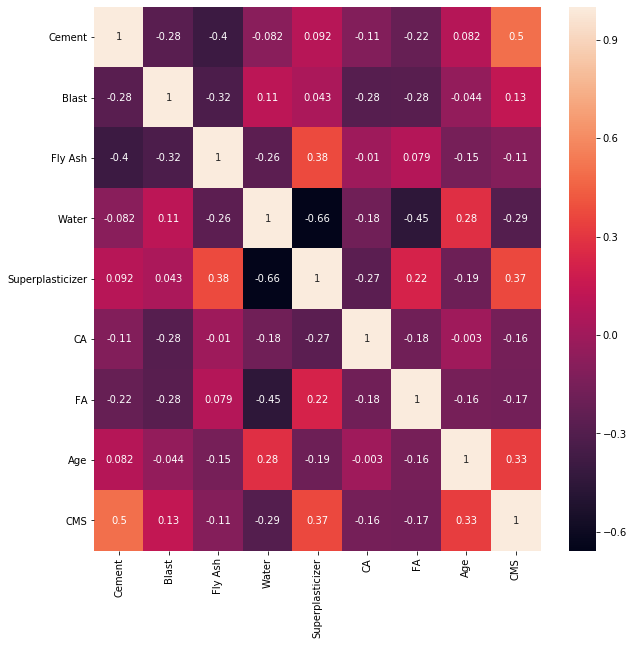

In [37]:
corr_hmap=concrete.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [100]:
concrete_new=concrete[(z<3).all(axis=1)]

In [101]:
concrete_new.shape

(981, 9)

In [102]:
concrete=concrete_new
concrete.shape

(981, 9)

In [103]:
x=concrete.iloc[:,0:-1]
x.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28


In [104]:
y=concrete.iloc[:,-1]
y.head()

0    79.99
1    61.89
5    47.03
7    36.45
8    45.85
Name: CMS, dtype: float64

In [105]:
x.shape

(981, 8)

In [106]:
y.shape

(981,)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=48)

In [108]:
x_train.shape

(657, 8)

In [109]:
y_train.shape

(657,)

In [110]:
lr=LinearRegression()

In [111]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
lr.coef_

array([ 0.12211096,  0.10283102,  0.08436444, -0.14093317,  0.3596717 ,
        0.01412111,  0.02000569,  0.21262179])

In [113]:
lr.intercept_

-24.88052543457762

In [114]:

concrete.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [115]:
lr.score(x_train,y_train)

0.7073382766191663

In [116]:

pred=lr.predict(x_test)
print("predicted result CMS:",pred)
print("actual CMS",y_test)

predicted result CMS: [23.23176667 48.75828359 30.45521745 28.90676861 52.66642081 17.09522705
 20.66746343 47.97544513 41.86507342 23.19682778 49.44223119 22.94632627
 63.27067952 25.03657742 27.72693355 54.17820475 33.64511715 29.23968824
 38.76048214 33.79063869 22.60587165 37.73985891 27.53982653 22.2242817
 32.09226734 30.96978483 21.6734318  52.66642081 26.57561747 54.17820475
 42.75360971 24.94461422 43.71779778 40.69206258 32.24124048 32.90595521
 39.86639621 15.42047892 25.69042766 21.78865676 45.16963064 63.98710887
 41.17135579 24.39613099 39.95890601 31.9766295  37.41069286 16.20939824
 36.77591911 44.92499308 32.37073339  8.25741797 24.94412974 18.85567915
 35.57620314 10.95542127 16.24031053 18.03404677 23.02341356 46.17353072
 26.06789629 50.51279558 21.27469978 32.95472298 33.23269258 20.98914185
 46.57587582 37.00786162 26.75058143 29.28875197 45.59524917 29.31826058
 70.71244227 15.79678264 48.59174402 20.44169543 34.43194757 53.90728885
 24.95179241 58.61460514 19.08

In [121]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
87.62121028932754


In [120]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6981787929704886
